# Predicting Bulldozer Price

In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [22]:
#Importing datasets

df = pd.read_csv('data/TrainAndValid.csv', low_memory = False, parse_dates=["saledate"])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

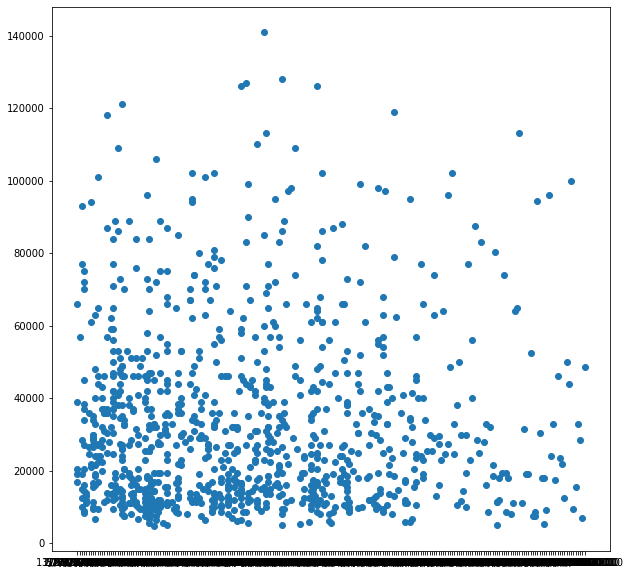

In [8]:
fig, ax = plt.subplots(figsize= (10,10))
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

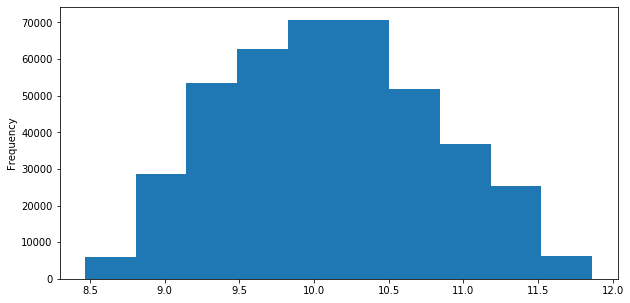

In [18]:
plt.figure(figsize = (10,5))
np.log(df.SalePrice).plot.hist();

In [25]:
df.saledate.dtype

dtype('<M8[ns]')

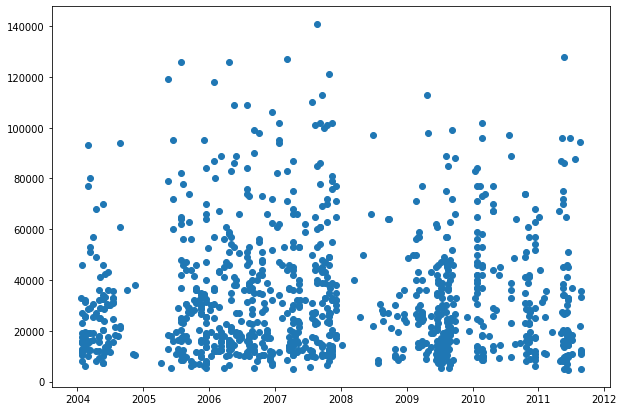

In [31]:
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [32]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [34]:
#Sorting data frame in saledate order
df.sort_values(by=["saledate"], inplace = True, ascending = True)
df.saledate[:20]

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
92531    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
92780    1989-01-31
238373   1989-01-31
127132   1989-01-31
115102   1989-01-31
32317    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [73]:
#Making a copy of dataframe
df_tmp = df.copy()

In [74]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [75]:
df_tmp.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500,30000,21000,33000,24000
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [76]:
df_tmp.drop("saledate", axis=1, inplace=True)

In [77]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [78]:
#Converting string to categories

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [79]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [80]:
df_tmp.state.cat.codes

205615    43
233186     8
142491     8
115536     8
92301      8
          ..
409901     4
405777     4
411889     4
411890     4
409203     4
Length: 412698, dtype: int8

## Missing value treatment

### Numeric data

In [81]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Adding a pointer to check whether the cell is filled with median values
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            #Filling missing values with median of the column
            df_tmp[label] = content.fillna(content.median())

In [82]:
for label, content in df_tmp.items():
    if pd.api.types.is_categorical_dtype(content):
        if pd.isnull(content).sum():
            #Adding a pointer to check whether the cell is filled with median values
            print(label, pd.isnull(content).sum())

UsageBand 339028
fiSecondaryDesc 140727
fiModelSeries 354031
fiModelDescriptor 337882
ProductSize 216605
Drive_System 305611
Enclosure 334
Forks 214983
Pad_Type 331602
Ride_Control 259970
Stick 331602
Transmission 224691
Turbocharged 331602
Blade_Extension 386715
Blade_Width 386715
Enclosure_Type 386715
Engine_Horsepower 386715
Hydraulics 82565
Pushblock 386715
Ripper 305753
Scarifier 386704
Tip_Control 386715
Tire_Size 315060
Coupler 192019
Coupler_System 367724
Grouser_Tracks 367823
Hydraulics_Flow 367823
Track_Type 310505
Undercarriage_Pad_Width 309782
Stick_Length 310437
Thumb 310366
Pattern_Changer 310437
Grouser_Type 310505
Backhoe_Mounting 331986
Blade_Type 330823
Travel_Controls 330821
Differential_Type 341134
Steering_Controls 341176


In [83]:
#Missing value treatment in categorical columns

for label, content in df_tmp.items():
    if pd.api.types.is_categorical_dtype(content):
        #if pd.isnull(content).sum():
        #Adding a pointer to check whether the cell is filled with median values
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        #Filling missing values with median of the column
        df_tmp[label] = pd.Categorical(content).codes + 1

In [84]:
df_tmp.UsageBand_is_missing.value_counts()

True     339028
False     73670
Name: UsageBand_is_missing, dtype: int64

In [85]:
df_tmp.isna().sum().T

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

## Modelling time

### Train Test Split

In [86]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
233186,1728883,30000.0,1523610,9105,132,99.0,1986,0.0,0,4772,...,True,True,True,True,True,True,True,True,True,True
142491,1508502,21000.0,1153157,4138,132,99.0,1972,0.0,0,2347,...,True,True,True,True,True,False,False,False,True,True
115536,1452578,33000.0,1544443,3854,132,99.0,1974,0.0,0,1767,...,True,True,True,True,True,True,True,True,False,False
92301,1403418,24000.0,1390168,7110,132,99.0,1986,0.0,0,744,...,True,True,True,True,True,True,True,True,True,True


In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
%%time

model = RandomForestRegressor(n_jobs = -1, random_state = 42)

model.fit(df_tmp.drop("SalePrice", axis =1), df_tmp["SalePrice"])

Wall time: 12min 23s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [90]:
model.score(df_tmp.drop("SalePrice", axis =1), df_tmp["SalePrice"])

0.9875966080326709

In [91]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [93]:
#Split Train and validation sets
df_val = df_tmp[df_tmp["saleYear"] == 2012]
df_train = df_tmp[df_tmp["saleYear"] != 2012]

In [94]:
len(df_val), len(df_train)

(11573, 401125)

In [97]:
X_train, y_train = df_train.drop("SalePrice", axis= 1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis= 1), df_val["SalePrice"]

In [98]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Creating a regression evaluation function

In [107]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score


def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, val_preds),
             "Training R2": r2_score(y_train, train_preds),
             "Valid R2": r2_score(y_valid, val_preds)}
    return scores
    

In [104]:
#Testing our model on a subset
model = RandomForestRegressor(n_jobs = -1,
                             random_state= 42,
                             max_samples = 10000, 
                              bootstrap= True)

In [105]:
%%time
model.fit(X_train, y_train)

Wall time: 32.8 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [108]:
%%time

show_scores(model)

Wall time: 9.66 s


{'Training MAE': 5548.995840324089,
 'Valid MAE': 7179.6961392897265,
 'Training RMSLE': 0.25737726780537257,
 'Valid RMSLE': 0.29404344200903443,
 'Training R2': 0.8610738743845616,
 'Valid R2': 0.8320179198265638}

### Hyperparameter tuning - RandomizedSearchCV

In [109]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
#Param grid for Random Search
rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt","auto"],
          "max_samples": [10000]}

In [112]:
#Building RS Model
rs_model = RandomizedSearchCV(RandomForestRegressor(
                                    n_jobs = -1,
                                    random_state= 42),
                             param_distributions= rf_grid,
                             cv=5,
                             n_iter = 5,
                             verbose = True)

In [113]:
#Fitting the model with train data
%%time

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  4.0min finished


Wall time: 4min 6s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [115]:
#Best Parameters of the model
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 18,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

### Tuning the model with hyperparameters

In [116]:
%%time

ideal_model = RandomForestRegressor(n_estimators= 40,
                                   min_samples_leaf= 1,
                                   min_samples_split= 14,
                                   max_features= 0.5,
                                   n_jobs= -1,
                                   max_samples= None,
                                   random_state= 42)

Wall time: 0 ns


In [117]:
%%time

ideal_model.fit(X_train, y_train)

Wall time: 2min 22s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [118]:
show_scores(ideal_model)

{'Training MAE': 2959.326985228402,
 'Valid MAE': 5946.693691458871,
 'Training RMSLE': 0.14484861530072243,
 'Valid RMSLE': 0.2459310364849841,
 'Training R2': 0.9587677680072929,
 'Valid R2': 0.882127719565017}

## Make predictions to the Test data

In [147]:
def preprocess_data(df_test):
    """
    Performs preprocessing data in the passed data set
    """
    df_test["saleYear"] = df_test.saledate.dt.year
    df_test["saleMonth"] = df_test.saledate.dt.month
    df_test["saleDay"] = df_test.saledate.dt.day
    df_test["saleDayOfWeek"] = df_test.saledate.dt.dayofweek
    df_test["saleDayOfYear"] = df_test.saledate.dt.dayofyear
    
    df_test.drop("saledate", axis=1, inplace=True)
    
    for label, content in df_test.items():
        if pd.api.types.is_string_dtype(content):
            df_test[label] = content.astype("category").cat.as_ordered()
    
    for label, content in df_test.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #Adding a pointer to check whether the cell is filled with median values
                df_test[label+"_is_missing"] = pd.isnull(content)
                #Filling missing values with median of the column
                df_test[label] = content.fillna(content.median())
                
        if pd.api.types.is_categorical_dtype(content):            
            #Adding a pointer to check whether the cell is filled with median values
            df_test[label+"_is_missing"] = pd.isnull(content)
            #Filling missing values with median of the column
            df_test[label] = pd.Categorical(content).codes + 1
    
    return df_test

In [148]:
df_test = pd.read_csv("data/Test.csv", low_memory= False, parse_dates= ["saledate"])

In [149]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [150]:
df_test = preprocess_data(df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [151]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
test_preds = ideal_model(df_test)

In [153]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [154]:
#Feature auctioneerID_is_missing is manually imputed in the data
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [155]:
#Making predictions on the test data
test_preds = ideal_model.predict(df_test)

In [157]:
type(test_preds)

numpy.ndarray

In [158]:
#Predcition set in same format as asked by Kaggle

df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds

df_preds

,SalesID,SalesPrice
0,1227829,20049.691524
1,1227844,19036.325710
2,1227847,45337.919055
3,1227848,62750.616122
4,1227863,49008.875461
...,...,...
12452,6643171,42457.715382
12453,6643173,18905.615433
12454,6643184,16052.438304
12455,6643186,19966.806529


In [162]:
df_preds.to_csv("data/final_submission.csv", index=False)

### Feature importance

In [168]:
pd.DataFrame(list(ideal_model.feature_importances_), index=X_train.columns)

,0
SalesID,0.035135
MachineID,0.017904
ModelID,0.040769
datasource,0.001700
auctioneerID,0.003377
...,...
Backhoe_Mounting_is_missing,0.000205
Blade_Type_is_missing,0.000166
Travel_Controls_is_missing,0.000192
Differential_Type_is_missing,0.000069


In [170]:
# Helper function for Feature Importances

def plot_features(columns, importances, n=20):
    #Create a feature imp data framce
    df = (pd.DataFrame({"Features": columns,
                      "Feature_Imp": importances})
         .sort_values("Feature_Imp", ascending = False)
         .reset_index(drop= True))
    
    #Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["Features"][:n], df["Feature_Imp"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importances")
    
    ax.invert_yaxis()
    

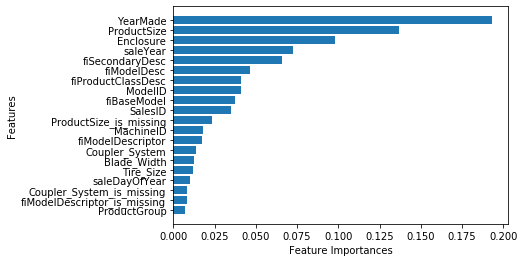

In [171]:
plot_features(X_train.columns, ideal_model.feature_importances_)